##**Flight Optimization**
By: Rinku Kalsi

#Importing Libraries

In [1]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=e1bdad7a881de791c606e773de11da35610e6cb7914e4b7a3d51a60e0461533b
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [2]:
#importing PYTHON libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n
from google.colab import files
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")



In [3]:
%matplotlib inline

#To import data from GitHub into Google Colab

In [4]:
#used this to directly import files from the provided github folder into this colab file
# Also replaced 'blob' with 'raw' to get content from URL

!wget https://github.com/CapitalOneRecruiting/DA-Airline-Data-Challenge/raw/main/data.zip


--2025-07-02 13:52:22--  https://github.com/CapitalOneRecruiting/DA-Airline-Data-Challenge/raw/main/data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CapitalOneRecruiting/DA-Airline-Data-Challenge/main/data.zip [following]
--2025-07-02 13:52:23--  https://raw.githubusercontent.com/CapitalOneRecruiting/DA-Airline-Data-Challenge/main/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46791650 (45M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  44.62M   260MB/s    in 0.2s    

2025-07-02 13:52:23 (260 MB/s) - ‘data.zip’ saved [46791650/4679165

In [5]:
#Unzipping the folder inported
!unzip /content/data.zip

Archive:  /content/data.zip
  inflating: Airline_Challenge_Metadata.xlsx  
  inflating: __MACOSX/._Airline_Challenge_Metadata.xlsx  
  inflating: Airport_Codes.csv       
  inflating: __MACOSX/._Airport_Codes.csv  
  inflating: Flights.csv             
  inflating: __MACOSX/._Flights.csv  
  inflating: Tickets.csv             
  inflating: __MACOSX/._Tickets.csv  


In [6]:
#converting csv files into pandas dataframe

df_tickets = pd.read_csv('/content/Tickets.csv')
df_flights = pd.read_csv('/content/Flights.csv')
df_airport_codes = pd.read_csv('/content/Airport_Codes.csv')

In [7]:
df_tickets

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM
...,...,...,...,...,...,...,...,...,...,...,...,...
1167280,201911284909,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,244.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,371.0,JNU
1167282,201911284940,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,271.0,JNU
1167283,201911284914,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,603.0,ANC


In [8]:
df_flights

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.550000
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.910000
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.670000
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


In [9]:
df_airport_codes

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...
55364,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,Yingkou,YKH,"122.3586, 40.542524"
55365,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,Shenyang,NaN,"123.49600219726562, 41.784400939941406"
55366,heliport,Sealand Helipad,40.0,EU,GB,Sealand,NaN,"1.4825, 51.894444"
55367,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,Grande Glorieuse,NaN,"47.296388888900005, -11.584277777799999"


#Data Filtering
Filterning data based on requirements asked.

The conditions that could be noted from problem statement are:

1. df_tickets : Have to consider ONLY roundtrips and ONLY US flights.
2. df_flights : NOT to consider cancelled flights.
3. df_airports : have to consider ONLY medium and large airports

In [10]:
df_tickets = df_tickets[df_tickets['ROUNDTRIP']==1]
df_flights = df_flights[df_flights['CANCELLED'] != 1]
df_airport_codes =df_airport_codes[(df_airport_codes['ISO_COUNTRY']=='US') & (df_airport_codes['TYPE'].isin(['medium_airport','large_airport']))]

#To Conduct Data Cleaning and perform Pre-processing

In [11]:
#For checking null values, data types, duplicates in all three datasets.

def check_data(df,dfname):
  print(f'No. of duplicates in dataset in {dfname}:{df.shape}', int(df.duplicated().sum()))
  print(df.info(verbose=True, show_counts=True))
  print(f'No. of Rows and Columns in {dfname}:{df.shape}')

In [12]:
# Using function to check each dataset

check_data(df_tickets, 'Tickets Data')
check_data(df_flights, 'Flights Data')
check_data(df_airport_codes, 'Airport Codes Data')

No. of duplicates in dataset in Tickets Data:(708600, 12) 47564
<class 'pandas.core.frame.DataFrame'>
Index: 708600 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            708600 non-null  int64  
 1   YEAR               708600 non-null  int64  
 2   QUARTER            708600 non-null  int64  
 3   ORIGIN             708600 non-null  object 
 4   ORIGIN_COUNTRY     708600 non-null  object 
 5   ORIGIN_STATE_ABR   708600 non-null  object 
 6   ORIGIN_STATE_NM    708600 non-null  object 
 7   ROUNDTRIP          708600 non-null  float64
 8   REPORTING_CARRIER  708600 non-null  object 
 9   PASSENGERS         707403 non-null  float64
 10  ITIN_FARE          708040 non-null  object 
 11  DESTINATION        708600 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 70.3+ MB
None
No. of Rows and Columns in Tickets Data:(708600, 12)
No. of duplicates in d

From observing the data, there are various columns in all three datasets that consists of missing values.

df_airport_codes : ELEVATION_FT, CONTINENT, MUNICIPALITY and IATA_CODE

df_tickets:  PASSENGERS and ITIN_FARE

df_flights: TAIL_NUM, DEP_DELAY, ARR_DELAY, AIR_TIME, DISTANCE and OCCUPANCY_RATE

df_tickets and df_flights contains duplicated records

In [13]:
#removing duplicate records
df_tickets = df_tickets.drop_duplicates()
df_flights = df_flights.drop_duplicates()

## Data Cleaning and Data Manipulation - Airport Data

Checking if any columns are irrelevant and can be dropped.
We see that ISO_COUNTRY, CONTINENT and ELEVATION_FT are irrelevant.

Dropping reason:
ISO_COUNTRY, CONTINENT : We are only focusing on US

ELEVATION_FT: We do not need elevation height to calculate cost.

In [14]:
#Retaining only needed columns

df_airport_codes =df_airport_codes[['TYPE','NAME','MUNICIPALITY','IATA_CODE','COORDINATES']]

In [15]:
#Checking for Null values

df_airport_codes[df_airport_codes.isnull().any(axis=1)]

,TYPE,NAME,MUNICIPALITY,IATA_CODE,COORDINATES
25963,medium_airport,South Alabama Regional At Bill Benton Field Ai...,Andalusia/Opp,NaN,"-86.393799, 31.3088"
27145,medium_airport,Shelby County Airport,Alabaster,NaN,"-86.78279877, 33.17699814"
27517,medium_airport,Wheeler Sack Army Air Field,Fort Drum,NaN,"-75.71949768, 44.05559921"
27648,medium_airport,Hurlburt Field,Mary Esther,NaN,"-86.68930053710938, 30.427799224853516"
27685,medium_airport,San Marcos Regional Airport,San Marcos,NaN,"-97.862999, 29.8927"
27822,medium_airport,Julian Carroll Airport,Jackson,NaN,"-83.31729888916016, 37.59389877319336"
27979,medium_airport,Monticello Municipal Ellis Field,Monticello,NaN,"-91.75099945, 33.6385994"
28221,medium_airport,Mc Minnville Municipal Airport,Mc Minnville,NaN,"-123.1360016, 45.19440079"
28345,medium_airport,Beaufort MCAS - Merritt Field,Beaufort,NaN,"-80.723197937, 32.4774017334"
28348,medium_airport,New River MCAS /H/ /Mccutcheon Fld/ Airport,Jacksonville,NaN,"-77.43969727, 34.70840073"


In [16]:
#Dropping rows where IATA_CODE is NAN

df_airport_codes=df_airport_codes.dropna(subset='IATA_CODE')


In [17]:
#Coordinates can be splitted into longitude and longitude values

Coordinates = df_airport_codes['COORDINATES'].str.split(',',expand = True)

In [18]:
df_airport_codes['latitude'] = Coordinates[1]
df_airport_codes['longitude'] = Coordinates[0]

In [19]:
#Reseting index would make it cleaner to merge data further
df_airport_codes= df_airport_codes.reset_index()

In [20]:
df_airport_codes

,index,TYPE,NAME,MUNICIPALITY,IATA_CODE,COORDINATES,latitude,longitude
0,6194,medium_airport,Aleknagik / New Airport,Aleknagik,WKK,"-158.617996216, 59.2826004028",59.2826004028,-158.617996216
1,26143,medium_airport,Lehigh Valley International Airport,Allentown,ABE,"-75.44080352783203, 40.652099609375",40.652099609375,-75.44080352783203
2,26144,medium_airport,Abilene Regional Airport,Abilene,ABI,"-99.68190002440001, 32.4113006592",32.4113006592,-99.68190002440001
3,26145,large_airport,Albuquerque International Sunport,Albuquerque,ABQ,"-106.609001, 35.040199",35.040199,-106.609001
4,26146,medium_airport,Aberdeen Regional Airport,Aberdeen,ABR,"-98.42179870605469, 45.449100494384766",45.449100494384766,-98.42179870605469
...,...,...,...,...,...,...,...,...
816,38972,medium_airport,Kahului Airport,Kahului,OGG,"-156.429993, 20.8986",20.8986,-156.429993
817,38974,medium_airport,Bradshaw Army Airfield,Camp Pohakuloa,BSF,"-155.554000854, 19.760099411",19.760099411,-155.554000854
818,38975,medium_airport,Hilo International Airport,Hilo,ITO,"-155.04800415039062, 19.721399307250977",19.721399307250977,-155.04800415039062
819,38976,medium_airport,Upolu Airport,Hawi,UPP,"-155.86000061035156, 20.265300750732422",20.265300750732422,-155.86000061035156


## Data Cleaning and Data Manipulation - Tickets Data

In [21]:
df_tickets


,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1647.0,JAX
...,...,...,...,...,...,...,...,...,...,...,...,...
1115053,201915099493,2019,1,YUM,US,AZ,Arizona,1.0,YV,1.0,585.0,FLL
1115057,201913421100,2019,1,YUM,US,AZ,Arizona,1.0,OO,1.0,692.0,ALB
1115058,201913421044,2019,1,YUM,US,AZ,Arizona,1.0,OO,1.0,600,MRY
1115066,201913420834,2019,1,YUM,US,AZ,Arizona,1.0,OO,1.0,705.0,ELP


In [22]:
# ITIN_FARE is object, converting it into float
# Directly converting ITIN_FARE gives us an error as the values contain $$$ sign
#Thus, first removing the $$$ sign

df_tickets['ITIN_FARE'] = df_tickets['ITIN_FARE'].str.replace('$','',regex = False)
df_tickets['ITIN_FARE'] = df_tickets['ITIN_FARE'].astype(float)

In [23]:
#For us to understand routes better, we shall concatenate the ORIGIN and DESTINATION column as ROUTE

def roundtrip(value1, value2):
    sections = [value1, value2]
    sections.sort()
    return '-'.join(sections)

df_tickets['ROUTE'] = df_tickets.apply(lambda row: roundtrip(row['ORIGIN'], row['DESTINATION']), axis=1)

In [24]:
# Checking if the data is only from 2019
df_tickets['YEAR'].unique()

array([2019])

In [25]:
# Checking the tickets dataset to see if they are from Q1
df_tickets['QUARTER'].unique()

array([1])

In [26]:
# Further to narrow down the data, we remove columns which are less relevant to our analysis.
df_tickets = df_tickets.drop(columns=['ITIN_ID', 'YEAR', 'QUARTER', 'ORIGIN', 'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ROUNDTRIP', 'REPORTING_CARRIER', 'DESTINATION'])

In [27]:
# Step 1: Calculating the average ITIN_FARE for each ROUTE group
# This creates a Series where the index is the ROUTE and the value is the average fare for that route

average_fare = df_tickets.groupby('ROUTE')['ITIN_FARE'].mean()

# Step 2: Filling missing values in ITIN_FARE with the corresponding average
df_tickets['ITIN_FARE'] = df_tickets.apply(
    lambda row: average_fare.get(row['ROUTE'], row['ITIN_FARE']) if pd.isnull(row['ITIN_FARE']) else row['ITIN_FARE'],
    axis=1
    )

In [28]:
#Checking if null values are present in ITIN_FARE at this stage
int(df_tickets['ITIN_FARE'].isna().sum())

6

In [29]:
# Dropped rows for routes where average fare is also null
df_tickets = df_tickets.dropna(subset=['ITIN_FARE'])

In [30]:
# Step 1: Calculating the average PASSENGERS for each ROUTE group
average_pass = df_tickets.groupby('ROUTE')['PASSENGERS'].mean()

# Step 2: Filling missing values in PASSENGERS with the corresponding average
df_tickets['PASSENGERS'] = df_tickets.apply(
    lambda row: average_pass.get(row['ROUTE'], row['PASSENGERS']) if pd.isnull(row['PASSENGERS']) else row['PASSENGERS'],
    axis=1
)

In [31]:
df_tickets

,PASSENGERS,ITIN_FARE,ROUTE
0,1.0,736.0,ABI-DAB
1,1.0,570.0,ABI-COS
2,1.0,564.0,ABI-MCO
3,1.0,345.0,ABI-LGA
10,1.0,1647.0,ABI-JAX
...,...,...,...
1115053,1.0,585.0,FLL-YUM
1115057,1.0,692.0,ALB-YUM
1115058,1.0,600.0,MRY-YUM
1115066,1.0,705.0,ELP-YUM


In [32]:
#Checking if null values are present in PASSENGERS at this stage
int(df_tickets['PASSENGERS'].isna().sum())

6

In [33]:
# Dropped rows for routes where average number of passengers is also null
df_tickets = df_tickets.dropna(subset=['PASSENGERS'])

In [34]:
df_tickets

,PASSENGERS,ITIN_FARE,ROUTE
0,1.0,736.0,ABI-DAB
1,1.0,570.0,ABI-COS
2,1.0,564.0,ABI-MCO
3,1.0,345.0,ABI-LGA
10,1.0,1647.0,ABI-JAX
...,...,...,...
1115053,1.0,585.0,FLL-YUM
1115057,1.0,692.0,ALB-YUM
1115058,1.0,600.0,MRY-YUM
1115066,1.0,705.0,ELP-YUM


In [35]:
# Remove rows where ITIN_FARE is zero or negative
df_tickets = df_tickets[df_tickets['ITIN_FARE']>0]
# Remove rows where the number of PASSENGERS is zero or negative
df_tickets = df_tickets[df_tickets['PASSENGERS']>0]

In [36]:
df_tickets

,PASSENGERS,ITIN_FARE,ROUTE
0,1.0,736.0,ABI-DAB
1,1.0,570.0,ABI-COS
2,1.0,564.0,ABI-MCO
3,1.0,345.0,ABI-LGA
10,1.0,1647.0,ABI-JAX
...,...,...,...
1115053,1.0,585.0,FLL-YUM
1115057,1.0,692.0,ALB-YUM
1115058,1.0,600.0,MRY-YUM
1115066,1.0,705.0,ELP-YUM


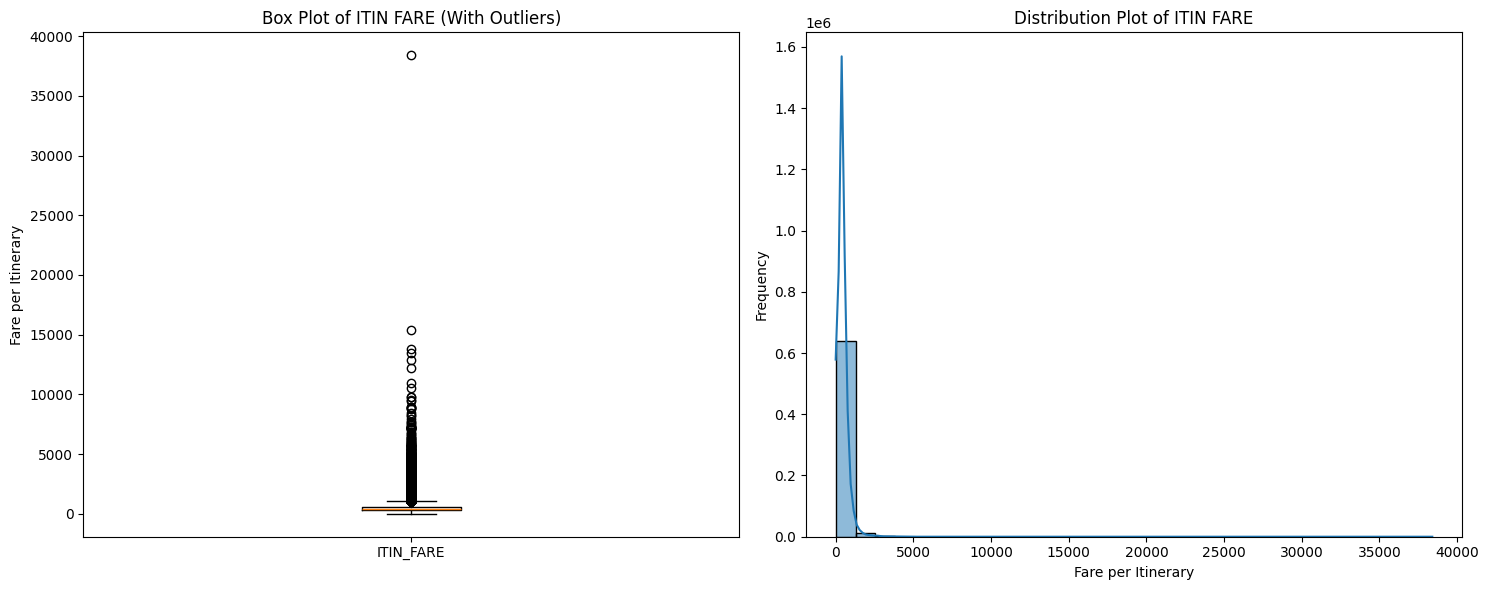

In [37]:
# Using box plot and histogram to visually inspect and handle outliers in ticket fare data

# Step 1: Set up a figure with 1 row and 2 columns (side-by-side plots)
# This will help in comparing the box plot and histogram for ITIN_FARE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# Step 2: Plot histogram with KDE (Kernel Density Estimation) for ITIN_FARE
# This will help us understand the distribution of fares (skewness, peaks)
sns.histplot(df_tickets['ITIN_FARE'], kde=True, ax=axes[1], bins=30)
axes[1].set_title('Distribution Plot of ITIN FARE')
axes[1].set_xlabel('Fare per Itinerary')
axes[1].set_ylabel('Frequency')

# Step 3: Plot box plot to visually detect outliers in ITIN_FARE
# Outliers will show up as individual points beyond the whiskers
axes[0].boxplot(df_tickets['ITIN_FARE'])
axes[0].set_title('Box Plot of ITIN FARE (With Outliers)')
axes[0].set_ylabel('Fare per Itinerary')
axes[0].set_xticklabels(['ITIN_FARE'])  # Set x-axis label

# Step 4: Adjust layout to prevent overlap and ensure clean presentation
plt.tight_layout()

# Step 5: Render both plots
plt.show()

1. The box plot and histogram reveal the presence of outliers with unusually high ticket fare values.

2. To address this, we can use the Interquartile Range (IQR) method to filter out these outliers from the dataset.



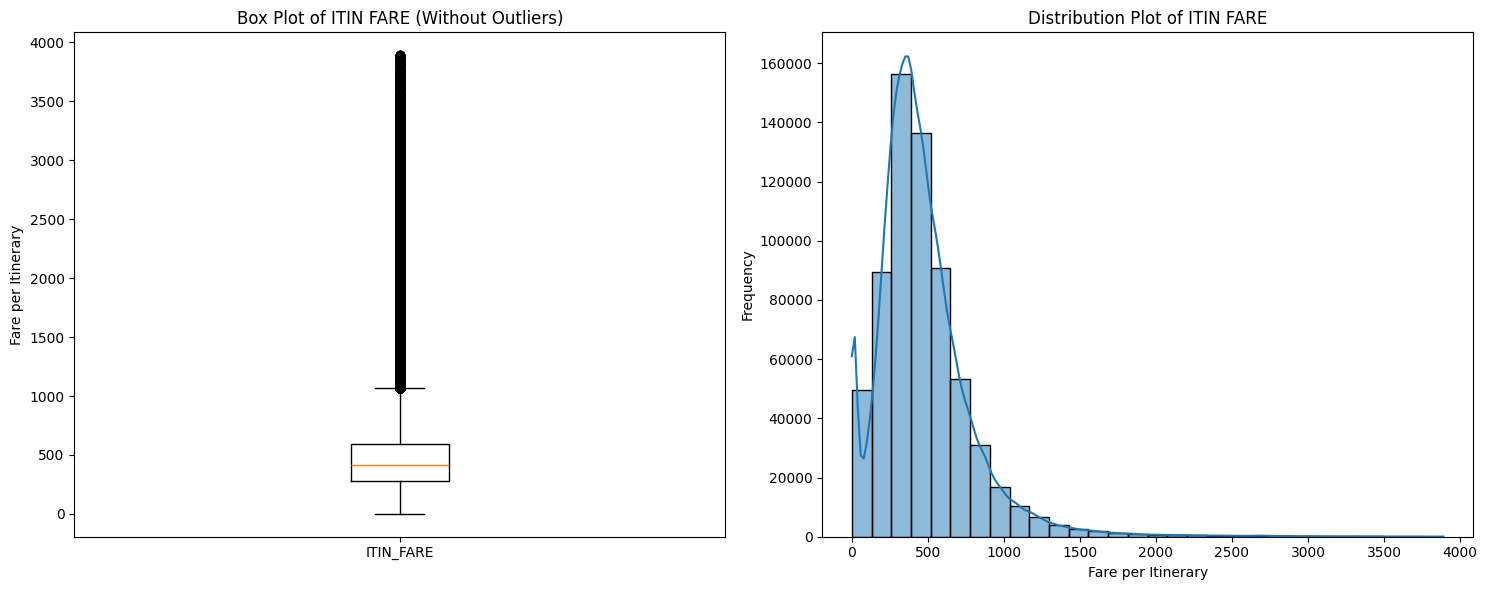

In [38]:
# Calculate Q1 and Q3 using custom percentiles for robust outlier detection
# Q1 is set at the 10th percentile and Q3 at the 99th percentile (less aggressive than traditional 25/75)
Q1 = df_tickets['ITIN_FARE'].quantile(0.1)
Q3 = df_tickets['ITIN_FARE'].quantile(0.99)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
# Any value outside this range is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove rows with ITIN_FARE outside the IQR range
# This step effectively removes extreme low/high fare values considered outliers
df_tickets = df_tickets[(df_tickets['ITIN_FARE'] >= lower_bound) & (df_tickets['ITIN_FARE'] <= upper_bound)]

# Set up a figure with 1 row and 2 columns for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with KDE curve to visualize distribution after outlier handling
# Helps verify whether the distribution is now smoother or more symmetric
sns.histplot(df_tickets['ITIN_FARE'], kde=True, ax=axes[1], bins=30)
axes[1].set_title('Distribution Plot of ITIN FARE')
axes[1].set_xlabel('Fare per Itinerary')
axes[1].set_ylabel('Frequency')

# Box plot of the cleaned ITIN_FARE data (after outlier removal)
# This helps confirm if outliers were successfully removed
axes[0].boxplot(df_tickets['ITIN_FARE'])
axes[0].set_title('Box Plot of ITIN FARE (Without Outliers)')
axes[0].set_ylabel('Fare per Itinerary')
axes[0].set_xticklabels(['ITIN_FARE'])  # Set x-axis label

# Automatically adjust layout to avoid overlapping elements
plt.tight_layout()

# Display the plots
plt.show()

Using a weighted average to capture a more representative fare per passenger per route.


In [39]:
# Step 1: Calculating the total fare paid per ticket
# This helps in later computing the weighted average fare for each route
df_tickets['WEIGHTED_FARE'] = df_tickets['ITIN_FARE'] * df_tickets['PASSENGERS']

# Step 2: Grouping the data by ROUTE and aggregate total weighted fare and total passengers
# Summing both gives us the basis for computing a passenger-weighted average fare
df_tickets = df_tickets.groupby('ROUTE').agg({
    'WEIGHTED_FARE': 'sum',
    'PASSENGERS': 'sum'
})

# Step 3: Computing the weighted average fare per route
# This shows the average fare paid per passenger, weighted by passenger volume
df_tickets['WEIGHTED_AVG_FARE'] = df_tickets['WEIGHTED_FARE'] / df_tickets['PASSENGERS']

# Step 4: Reseting the index so 'ROUTE' becomes a regular column again (not an index)
# This is useful for further analysis or exporting the DataFrame
df_tickets = df_tickets.reset_index()

In [40]:
df_tickets


,ROUTE,WEIGHTED_FARE,PASSENGERS,WEIGHTED_AVG_FARE
0,ABE-ABI,758.0,1.0,758.000000
1,ABE-ABQ,1068.0,2.0,534.000000
2,ABE-AGS,1173.0,3.0,391.000000
3,ABE-AMA,654.0,1.0,654.000000
4,ABE-ASE,1484.0,2.0,742.000000
...,...,...,...,...
25776,VLD-XNA,2336.0,3.0,778.666667
25777,VPS-XNA,6357.0,30.0,211.900000
25778,VPS-YUM,796.0,1.0,796.000000
25779,WRG-YAK,745.0,1.0,745.000000


In [41]:
# Drop intermediate columns no longer needed for final calculations
df_tickets = df_tickets.drop(columns=['WEIGHTED_FARE','PASSENGERS'])

# Adjust weighted average fare for one-way since data represents one leg of a round trip
df_tickets['WEIGHTED_AVG_FARE']=df_tickets['WEIGHTED_AVG_FARE']/2

df_tickets = df_tickets.reset_index()

##Data Cleaning and Data Manipulation - Flights Data


In [42]:
df_flights.shape
#dropping unnecessary columns
df_flights = df_flights.drop(columns=["OP_CARRIER","TAIL_NUM","OP_CARRIER_FL_NUM","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID"])

In [43]:
# Check unique values in FL_DATE to inspect date format consistency
df_flights.FL_DATE.unique()
# Converting FL_DATE column to datetime format using mixed parsing to handle inconsistencies
df_flights['FL_DATE'] = pd.to_datetime(df_flights['FL_DATE'],format='mixed')

df_flights[(df_flights['FL_DATE'] >= '2019-01-01') & (df_flights['FL_DATE'] <= '2019-03-31')]

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,RSW,"Fort Myers, FL",CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000
1,2019-03-02,RSW,"Fort Myers, FL",CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.550000
2,2019-03-02,RSW,"Fort Myers, FL",CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.910000
3,2019-03-02,RSW,"Fort Myers, FL",CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.670000
4,2019-03-02,RSW,"Fort Myers, FL",DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.620000
...,...,...,...,...,...,...,...,...,...,...,...
1911336,2019-03-23,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1911337,2019-03-24,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1911338,2019-03-25,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1911339,2019-03-26,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


Summarization -

The row count in the above snapshot of flights_df indicates that the dataset is limited to Q1 2019.

The AIR_TIME and DISTANCE columns contain non-numeric values such as spelled-out words (e.g., "two", "hundred") and special characters (e.g., "$", ""*), showing data quality issues.

The following steps were taken to handle these inconsistencies.

In [44]:
# Convert AIR_TIME to numeric; non-numeric values are set to NaN
airtime_numeric = pd.to_numeric(df_flights['AIR_TIME'], errors='coerce')

# Identify rows where AIR_TIME is non-numeric (conversion failed) but the original value is not missing
df_flights[airtime_numeric.isna() & df_flights['AIR_TIME'].notna()]

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1910876,2019-03-09,MIA,"Miami, FL",PHL,"Philadelphia, PA",-7.0,0.0,0.0,Two,1013,0.477567
1910948,2019-03-27,SJC,"San Jose, CA",PHX,"Phoenix, AZ",-2.0,-16.0,0.0,NAN,NaN,0.435761
1910989,2019-03-01,BOS,"Boston, MA",MIA,"Miami, FL",-6.0,-16.0,0.0,$$$,1258,0.482255
1910990,2019-03-02,BOS,"Boston, MA",MIA,"Miami, FL",-8.0,-28.0,0.0,$$$,1258,0.998723
1910991,2019-03-03,BOS,"Boston, MA",MIA,"Miami, FL",-4.0,-17.0,0.0,$$$,1258,0.870626
...,...,...,...,...,...,...,...,...,...,...,...
1911184,2019-03-29,PIT,"Pittsburgh, PA",ORD,"Chicago, IL",-5.0,-24.0,0.0,$$$,****,0.977221
1911185,2019-03-30,PIT,"Pittsburgh, PA",ORD,"Chicago, IL",-2.0,-21.0,0.0,$$$,****,0.455635
1911186,2019-03-31,PIT,"Pittsburgh, PA",ORD,"Chicago, IL",-4.0,-13.0,0.0,$$$,****,0.759544
1911187,2019-03-01,BOS,"Boston, MA",ORD,"Chicago, IL",-5.0,-5.0,0.0,$$$,****,NaN


In [45]:
# Attempt to convert DISTANCE to numeric; invalid entries are set to NaN
airtime_numeric = pd.to_numeric(df_flights['DISTANCE'], errors='coerce')

# Identify rows where DISTANCE conversion failed but the original value is not missing
df_flights[airtime_numeric.isna() & df_flights['DISTANCE'].notna()]

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1910839,2019-01-02,RSW,"Fort Myers, FL",MDW,"Chicago, IL",5.0,8.0,0.0,164,Hundred,0.801909
1910862,2019-03-26,BWI,"Baltimore, MD",DFW,"Dallas/Fort Worth, TX",-2.0,-34.0,0.0,170,Twenty,0.395130
1910884,2019-03-16,DFW,"Dallas/Fort Worth, TX",SAT,"San Antonio, TX",-5.0,-3.0,0.0,48,NAN,0.621457
1910945,2019-03-24,SJC,"San Jose, CA",PHX,"Phoenix, AZ",-4.0,-13.0,0.0,NaN,NAN,0.675682
1910981,2019-03-24,JFK,"New York, NY",ORD,"Chicago, IL",-3.0,-16.0,0.0,134,****,0.890574
...,...,...,...,...,...,...,...,...,...,...,...
1911336,2019-03-23,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1911337,2019-03-24,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1911338,2019-03-25,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1911339,2019-03-26,TUL,"Tulsa, OK",CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


In [46]:
# Define a function to clean and convert string values to numeric (int/float)
def convert_to_num(value):
    try:
        # Try to convert directly to float
        return float(value)
    except ValueError:
        try:
            # If direct conversion fails, try converting word numbers to numeric values
            return w2n.word_to_num(value)
        except ValueError:
            return float('nan')   # If both conversions fail, return NaN

# Apply the conversion function to AIR_TIME and DISTANCE columns
df_flights['AIR_TIME'] = df_flights['AIR_TIME'].apply(convert_to_num)
df_flights['DISTANCE'] = df_flights['DISTANCE'].apply(convert_to_num)

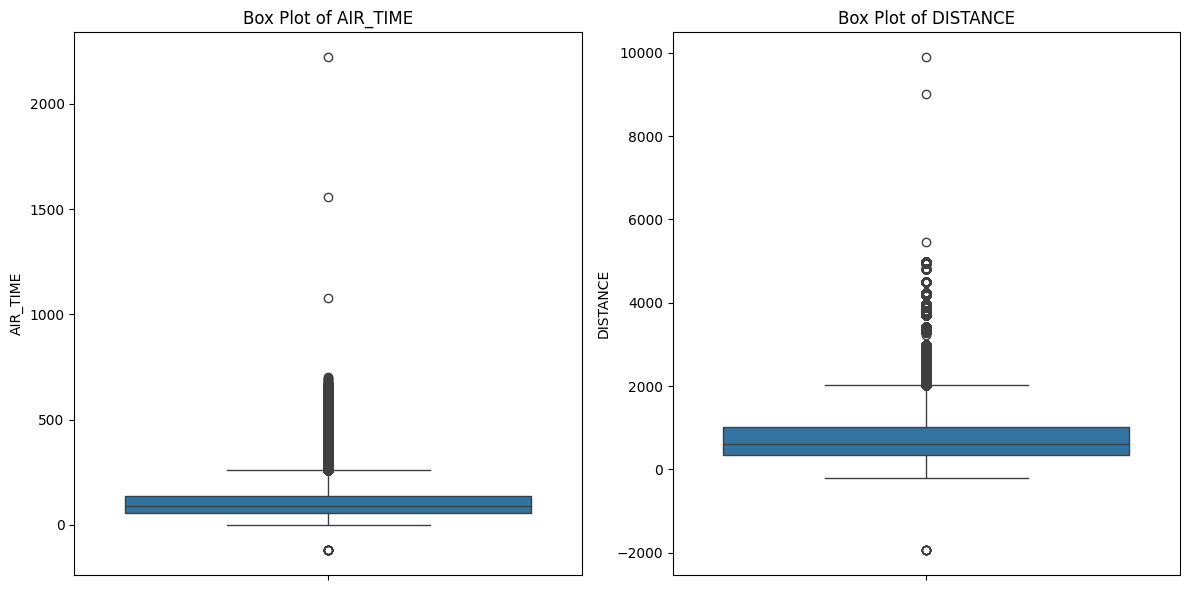

In [47]:
# Set up the overall figure size for better visibility of both plots side by side
plt.figure(figsize=(12, 6))

# Create box plot for AIR_TIME to visualize distribution and identify outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.boxplot(data=df_flights, y='AIR_TIME')
plt.title('Box Plot of AIR_TIME')

# Create box plot for DISTANCE to detect skewness, spread, and potential anomalies
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(data=df_flights, y='DISTANCE')
plt.title('Box Plot of DISTANCE')

# Adjust spacing to ensure titles and plots don’t overlap; displaying the final plot
plt.tight_layout()
plt.show()

We see that the box plot reveals the presence of outliers in AIR_TIME and DISTANCE, including invalid negative values.

In [48]:
# Filter out rows where AIR_TIME is zero or negative, as these are invalid for analysis
df_flights = df_flights[df_flights['AIR_TIME']>0]

# Filter out rows where DISTANCE is zero or negative, ensuring only valid flight records are used
df_flights = df_flights[df_flights['DISTANCE']>0]


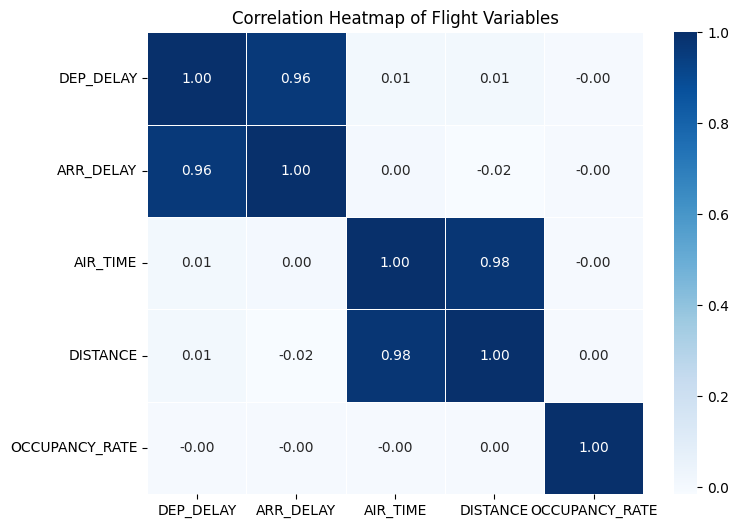

In [49]:
# Calculate the correlation matrix for selected numerical flight-related columns
# This helps identify linear relationships between features
correlation_matrix = df_flights[['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE','OCCUPANCY_RATE']].corr()

# Set up the plot size for better visibility
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.7)

# Add a title and display the heatmap
plt.title('Correlation Heatmap of Flight Variables')
plt.show()

Departure and arrival delays are highly correlated (0.96), indicating that late departures strongly contribute to late arrivals.

Air time and distance have a very strong correlation (0.98), suggesting one could be dropped in modeling to avoid redundancy.

These strong correlations can be leveraged to impute missing values using a KNNImputer, which estimates nulls based on similarity between neighboring rows.

Occupancy rate shows no significant correlation with other flight variables, implying it is influenced by external factors like demand or scheduling.




In [50]:
# Apply KNN imputation to specified columns and return a DataFrame with imputed values
def knn_imputer(df, columns, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_array = imputer.fit_transform(df[columns])
    df_imputed = pd.DataFrame(imputed_array, columns=columns, index=df.index)  # Convert the imputed NumPy array back into a DataFrame with original index and column names
    return df_imputed

In [51]:
imputed_delays = knn_imputer(df_flights, ['DEP_DELAY', 'ARR_DELAY'])
df_flights.update(imputed_delays)

In [52]:
imputed_flight_data = knn_imputer(df_flights, ['AIR_TIME', 'DISTANCE'])
df_flights.update(imputed_flight_data)

In [53]:
# Show number of null values in each column
df_flights.isna().sum()
df_flights = df_flights.reset_index()

In [54]:
#Create ROUTE column in flights dataset to merge with tickets
df_flights['ROUTE'] = df_flights.apply(lambda row: roundtrip(row['ORIGIN'], row['DESTINATION']), axis=1)

## **Joining Data**
##Merging datasets to analyse Busiest and most Profitable ROUNDTRIPS

In [56]:
# Merge airport codes with flight data to enrich flight records with origin airport details
df_airport_flights = df_airport_codes.merge(df_flights, how='inner', left_on='IATA_CODE', right_on='ORIGIN')
df_airport_flights = df_airport_flights.drop(columns=['MUNICIPALITY','IATA_CODE', 'COORDINATES'])

# Rename columns for clarity and to reflect that the data corresponds to the origin airport
df_airport_flights = df_airport_flights.rename(columns={'TYPE':'ORIGIN_TYPE', 'NAME':'ORIGIN_AIRPORT_NAME', 'latitude': 'ORIGIN_LAT', 'longitude':'ORIGIN_LONG'})

In [58]:
df_airport_flights

,index_x,ORIGIN_TYPE,ORIGIN_AIRPORT_NAME,ORIGIN_LAT,ORIGIN_LONG,index_y,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ROUTE
0,26143,medium_airport,Lehigh Valley International Airport,40.652099609375,-75.44080352783203,17880,2019-03-13,ABE,"Allentown/Bethlehem/Easton, PA",DTW,"Detroit, MI",-8.0,-18.0,0.0,86.0,425.0,0.47,ABE-DTW
1,26143,medium_airport,Lehigh Valley International Airport,40.652099609375,-75.44080352783203,17899,2019-03-13,ABE,"Allentown/Bethlehem/Easton, PA",DTW,"Detroit, MI",-1.0,-16.0,0.0,78.0,425.0,0.34,ABE-DTW
2,26143,medium_airport,Lehigh Valley International Airport,40.652099609375,-75.44080352783203,17903,2019-03-13,ABE,"Allentown/Bethlehem/Easton, PA",DTW,"Detroit, MI",-4.0,0.0,0.0,75.0,425.0,0.95,ABE-DTW
3,26143,medium_airport,Lehigh Valley International Airport,40.652099609375,-75.44080352783203,20239,2019-03-14,ABE,"Allentown/Bethlehem/Easton, PA",DTW,"Detroit, MI",2.0,-1.0,0.0,90.0,425.0,0.31,ABE-DTW
4,26143,medium_airport,Lehigh Valley International Airport,40.652099609375,-75.44080352783203,20258,2019-03-14,ABE,"Allentown/Bethlehem/Easton, PA",DTW,"Detroit, MI",-4.0,-17.0,0.0,75.0,425.0,0.67,ABE-DTW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838795,38975,medium_airport,Hilo International Airport,19.721399307250977,-155.04800415039062,1741694,2019-01-02,ITO,"Hilo, HI",LAX,"Los Angeles, CA",-2.0,5.0,0.0,286.0,2449.0,0.46,ITO-LAX
1838796,38975,medium_airport,Hilo International Airport,19.721399307250977,-155.04800415039062,1743377,2019-01-01,ITO,"Hilo, HI",LAX,"Los Angeles, CA",-2.0,26.0,0.0,309.0,2449.0,0.97,ITO-LAX
1838797,38975,medium_airport,Hilo International Airport,19.721399307250977,-155.04800415039062,1744918,2019-01-31,ITO,"Hilo, HI",LAX,"Los Angeles, CA",-5.0,-14.0,0.0,273.0,2449.0,0.57,ITO-LAX
1838798,38975,medium_airport,Hilo International Airport,19.721399307250977,-155.04800415039062,1903819,2019-01-24,ITO,"Hilo, HI",LAX,"Los Angeles, CA",-6.0,-16.0,0.0,274.0,2449.0,0.82,ITO-LAX


In [60]:
# Merge airports_df and flights_df to get destination related columns
df_airport_flights = df_airport_codes.merge(df_airport_flights, how='inner', left_on='IATA_CODE', right_on='DESTINATION')
df_airport_flights = df_airport_flights.drop(columns=['MUNICIPALITY','IATA_CODE', 'COORDINATES'])

# Rename columns for clarity and to reflect that the data corresponds to the origin airport
df_airport_flights = df_airport_flights.rename(columns={'TYPE':'DEST_TYPE', 'NAME':'DEST_AIRPORT_NAME', 'latitude': 'DEST_LAT', 'longitude':'DEST_LONG'})

In [61]:
#Filtering out columns which will be required for further analysis
df_airport_flights = df_airport_flights[['ROUTE',
       'ORIGIN', 'ORIGIN_CITY_NAME','ORIGIN_TYPE', 'ORIGIN_AIRPORT_NAME', 'ORIGIN_LAT', 'ORIGIN_LONG',
        'DESTINATION', 'DEST_CITY_NAME', 'DEST_TYPE', 'DEST_AIRPORT_NAME', 'DEST_LAT', 'DEST_LONG',
        'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE']]

df_merge = df_airport_flights.merge(df_tickets, how='inner', on='ROUTE')

## Now we do Data Analysis

Determining the top 10 round-trip routes with the highest number of completed flights in the quarter, excluding any canceled flights from the count.

In [62]:
# Group by ROUTE to count number of flights for each route

 # Count occurrences of each route
df_flight_count = df_merge.groupby('ROUTE').agg(
    NUMBER_OF_FLIGHTS = ('ROUTE', 'size')
)
df_flight_count = df_flight_count.reset_index()

In [63]:

# Use 'first' to retain one representative value for each route
df_route = df_merge.groupby('ROUTE').agg({
    'ORIGIN':'first', 'ORIGIN_CITY_NAME':'first','ORIGIN_TYPE':'first', 'ORIGIN_AIRPORT_NAME':'first', 'ORIGIN_LAT':'first', 'ORIGIN_LONG':'first',
    'DESTINATION':'first', 'DEST_CITY_NAME':'first', 'DEST_TYPE':'first', 'DEST_AIRPORT_NAME':'first', 'DEST_LAT':'first', 'DEST_LONG':'first'
})
df_route=df_route.reset_index()
df_flight_count = df_flight_count.merge(df_route, how='inner', on='ROUTE') # Merge the flight count data with route metadata for a complete view of each route

In [64]:
# Top 10 busiest routes by number of flights
Top_routes_by_flight_count = df_flight_count.sort_values('NUMBER_OF_FLIGHTS', ascending=False).head(10)

In [65]:
Top_routes_by_flight_count

,ROUTE,NUMBER_OF_FLIGHTS,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_TYPE,ORIGIN_AIRPORT_NAME,ORIGIN_LAT,ORIGIN_LONG,DESTINATION,DEST_CITY_NAME,DEST_TYPE,DEST_AIRPORT_NAME,DEST_LAT,DEST_LONG
2136,LAX-SFO,8333,SFO,"San Francisco, CA",large_airport,San Francisco International Airport,37.61899948120117,-122.375,LAX,"Los Angeles, CA",large_airport,Los Angeles International Airport,33.94250107,-118.4079971
2177,LGA-ORD,7146,ORD,"Chicago, IL",large_airport,Chicago O'Hare International Airport,41.9786,-87.9048,LGA,"New York, NY",large_airport,La Guardia Airport,40.77719879,-73.87259674
2041,LAS-LAX,6506,LAX,"Los Angeles, CA",large_airport,Los Angeles International Airport,33.94250107,-118.4079971,LAS,"Las Vegas, NV",large_airport,McCarran International Airport,36.08010101,-115.1520004
1986,JFK-LAX,6299,LAX,"Los Angeles, CA",large_airport,Los Angeles International Airport,33.94250107,-118.4079971,JFK,"New York, NY",large_airport,John F Kennedy International Airport,40.63980103,-73.77890015
2135,LAX-SEA,4992,SEA,"Seattle, WA",large_airport,Seattle Tacoma International Airport,47.449001,-122.308998,LAX,"Los Angeles, CA",large_airport,Los Angeles International Airport,33.94250107,-118.4079971
541,BOS-LGA,4816,LGA,"New York, NY",large_airport,La Guardia Airport,40.77719879,-73.87259674,BOS,"Boston, MA",large_airport,General Edward Lawrence Logan International Ai...,42.36429977,-71.00520325
1751,HNL-OGG,4793,OGG,"Kahului, HI",medium_airport,Kahului Airport,20.8986,-156.429993,HNL,"Honolulu, HI",large_airport,Daniel K Inouye International Airport,21.32062,-157.924228
2583,PDX-SEA,4771,SEA,"Seattle, WA",large_airport,Seattle Tacoma International Airport,47.449001,-122.308998,PDX,"Portland, OR",large_airport,Portland International Airport,45.58869934,-122.5979996
188,ATL-MCO,4707,MCO,"Orlando, FL",large_airport,Orlando International Airport,28.429399490356445,-81.30899810791016,ATL,"Atlanta, GA",large_airport,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101
184,ATL-LGA,4589,LGA,"New York, NY",large_airport,La Guardia Airport,40.77719879,-73.87259674,ATL,"Atlanta, GA",large_airport,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101


1. Calculating the operational cost of using an airport based on its type:

$5,000 for medium

$10,000 for large airports.

Since the data represents one leg of a roundtrip, using half the stated cost per flight leg!

In [66]:
# This function assigns operational cost based on the types of origin and destination airports
def set_operate_cost(row):
    if row['ORIGIN_TYPE'] == 'medium_airport' and row['DEST_TYPE'] == 'medium_airport':
        return 5000
    elif row['ORIGIN_TYPE'] == 'large_airport' and row['DEST_TYPE'] == 'large_airport':
        return 10000
    elif row['ORIGIN_TYPE'] == 'medium_airport' and row['DEST_TYPE'] == 'large_airport':
        return 7500
    elif row['ORIGIN_TYPE'] == 'large_airport' and row['DEST_TYPE'] == 'medium_airport':
        return 7500
    else:
        return 0
# Apply the function row-wise to calculate operational cost for each flight
df_merge['OPERATIONAL_COST'] = df_merge.apply(set_operate_cost, axis=1)

2. Identify the 10 most profitable round-trip routes for the quarter (excluding upfront airplane cost).
For each route, displaying profit, total revenue, total cost, key component summaries, and the total number of completed round-trip flights.
Canceled flights being excluded from all calculations.

(Since each row in the merged df represents one leg of the roundtrip, total operational cost of route is divided by two)

Estimating the number of passengers per flight by applying the occupancy rate to a 200-seat capacity.

Using this to calculate revenue from ticket fares and baggage fees.

Also, compute costs associated with arrival and departure delays.

In [67]:
df_merge['N_PASSENGERS'] = df_merge['OCCUPANCY_RATE']*200
df_merge['BAGGAGE_REVENUE'] = df_merge['N_PASSENGERS']*0.5*35
df_merge['TICKET_REVENUE'] =  df_merge['N_PASSENGERS']*df_merge['WEIGHTED_AVG_FARE']
df_merge['TOTAL_REVENUE'] = df_merge['BAGGAGE_REVENUE']+df_merge['TICKET_REVENUE']


In [68]:

# Calculate departure delay cost: $75 per minute for delays beyond 15 minutes
df_merge['DEP_DELAY_COST'] = np.where(df_merge.DEP_DELAY>15, (df_merge.DEP_DELAY-15)*75,0)

# Calculate arrival delay cost: $75 per minute for delays beyond 15 minutes
df_merge['ARR_DELAY_COST'] = np.where(df_merge.ARR_DELAY>15, (df_merge.ARR_DELAY-15)*75,0)

In [69]:
# Calculate operating and maintenance (OM) cost based on distance and per-mile rate
# Formula: DISTANCE * (base rate + variable component)
df_merge['OM_COST'] = df_merge['DISTANCE']*(8+1.18)

# Calculate total cost by summing all cost components:
df_merge['TOTAL_COST'] = df_merge['OM_COST']+df_merge['OPERATIONAL_COST']+df_merge['DEP_DELAY_COST']+df_merge['ARR_DELAY_COST']

In [70]:
#Calculating net profit and saving to a new column
df_merge['NET_PROFIT']= df_merge['TOTAL_REVENUE']-df_merge['TOTAL_COST']

In [71]:
df_merge = df_merge.groupby('ROUTE').agg({
    'DEP_DELAY':'median', 'ARR_DELAY': 'median', 'AIR_TIME': 'median', 'DISTANCE': 'median', 'OCCUPANCY_RATE': 'mean',
    'WEIGHTED_AVG_FARE' : 'mean', 'OPERATIONAL_COST' : 'sum','N_PASSENGERS' : 'sum', 'BAGGAGE_REVENUE' : 'sum',
    'TICKET_REVENUE' : 'sum', 'TOTAL_REVENUE' : 'sum', 'DEP_DELAY_COST' : 'sum', 'ARR_DELAY_COST' : 'sum', 'OM_COST' : 'sum',
    'TOTAL_COST' : 'sum', 'NET_PROFIT' : 'sum'
})

In [72]:
df_merge = df_merge.reset_index()

# Merge flight count information into the main dataset using ROUTE as the key
df_merge = df_merge.merge(df_flight_count, how = 'inner', on = 'ROUTE')

In [73]:
df_merge = df_merge[['ROUTE', 'NUMBER_OF_FLIGHTS', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_TYPE', 'ORIGIN_AIRPORT_NAME', 'ORIGIN_LAT', 'ORIGIN_LONG',
       'DESTINATION', 'DEST_CITY_NAME', 'DEST_TYPE', 'DEST_AIRPORT_NAME',
       'DEST_LAT', 'DEST_LONG', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE',
       'OCCUPANCY_RATE', 'WEIGHTED_AVG_FARE', 'OPERATIONAL_COST',
       'N_PASSENGERS', 'BAGGAGE_REVENUE', 'TICKET_REVENUE', 'TOTAL_REVENUE',
       'DEP_DELAY_COST', 'ARR_DELAY_COST', 'OM_COST', 'TOTAL_COST',
       'NET_PROFIT']]

In [74]:
# Top 10 most profitable routes
top_routes_by_profit = df_merge.sort_values('NET_PROFIT',ascending=False).head(10)

In [75]:
top_routes_by_profit

,ROUTE,NUMBER_OF_FLIGHTS,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_TYPE,ORIGIN_AIRPORT_NAME,ORIGIN_LAT,ORIGIN_LONG,DESTINATION,DEST_CITY_NAME,...,OPERATIONAL_COST,N_PASSENGERS,BAGGAGE_REVENUE,TICKET_REVENUE,TOTAL_REVENUE,DEP_DELAY_COST,ARR_DELAY_COST,OM_COST,TOTAL_COST,NET_PROFIT
130,ATL-CLT,3074,CLT,"Charlotte, NC",large_airport,Charlotte Douglas International Airport,35.2140007019043,-80.94309997558594,ATL,"Atlanta, GA",...,30740000,398806.0,6979105.0,9.936009e+07,1.063392e+08,1382625.0,1326750.0,6377566.32,39826941.32,6.651225e+07
828,CLT-FLO,504,FLO,"Florence, SC",medium_airport,Florence Regional Airport,34.18539810180664,-79.7238998413086,CLT,"Charlotte, NC",...,3780000,65374.0,1144045.0,6.534131e+07,6.648536e+07,219975.0,228375.0,458045.28,4686395.28,6.179896e+07
834,CLT-GSP,1547,GSP,"Greer, SC",large_airport,Greenville Spartanburg International Airport,34.8956985474,-82.2189025879,CLT,"Charlotte, NC",...,15470000,200980.0,3517150.0,7.218532e+07,7.570247e+07,817950.0,729075.0,1065109.50,18082134.50,5.762033e+07
1112,DCA-ORD,3688,ORD,"Chicago, IL",large_airport,Chicago O'Hare International Airport,41.9786,-87.9048,DCA,"Washington, DC",...,36880000,477842.0,8362235.0,1.127629e+08,1.211252e+08,3039375.0,3323700.0,20719774.08,63962849.08,5.716232e+07
833,CLT-GSO,1487,GSO,"Greensboro/High Point, NC",large_airport,Piedmont Triad International Airport,36.097801208496094,-79.93730163574219,CLT,"Charlotte, NC",...,14870000,193618.0,3388315.0,6.641097e+07,6.979929e+07,697725.0,642450.0,1133004.78,17343179.78,5.245611e+07
1287,DFW-IAH,2954,IAH,"Houston, TX",large_airport,George Bush Intercontinental Houston Airport,29.984399795532227,-95.34140014648438,DFW,"Dallas/Fort Worth, TX",...,29540000,384584.0,6730220.0,8.438702e+07,9.111724e+07,2199675.0,2421150.0,6074369.28,40235194.28,5.088205e+07
842,CLT-ILM,1465,ILM,"Wilmington, NC",medium_airport,Wilmington International Airport,34.270599365234375,-77.90260314941406,CLT,"Charlotte, NC",...,10987500,192186.0,3363255.0,6.188389e+07,6.524715e+07,556575.0,504525.0,2488009.50,14536609.50,5.071054e+07
191,ATL-MEM,1679,MEM,"Memphis, TN",large_airport,Memphis International Airport,35.04240036010742,-89.97669982910156,ATL,"Atlanta, GA",...,16790000,217072.0,3798760.0,6.643119e+07,7.022995e+07,488175.0,472350.0,5117189.04,22867714.04,4.736223e+07
127,ATL-CHS,1647,CHS,"Charleston, SC",large_airport,Charleston Air Force Base-International Airport,32.89860153,-80.04049683,ATL,"Atlanta, GA",...,16470000,212422.0,3717385.0,6.317615e+07,6.689353e+07,330450.0,283650.0,3915940.14,21000040.14,4.589349e+07
887,CLT-RIC,1522,RIC,"Richmond, VA",large_airport,Richmond International Airport,37.50519943237305,-77.3197021484375,CLT,"Charlotte, NC",...,15220000,199530.0,3491775.0,6.136674e+07,6.485851e+07,552600.0,536775.0,3590793.72,19900168.72,4.495835e+07


In [76]:
# Calculate the number of round trips by dividing total flights by 2 and taking the floor value
df_merge['NUMBER_OF_ROUNDTRIPS']=np.floor(df_merge['NUMBER_OF_FLIGHTS']/2)

In [77]:
#Filtering routes with atleast 100 roundtrips to recommend new routes
df_merge = df_merge[df_merge['NUMBER_OF_ROUNDTRIPS']>=100]

In [79]:
df_merge.describe()

,NUMBER_OF_FLIGHTS,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,WEIGHTED_AVG_FARE,OPERATIONAL_COST,N_PASSENGERS,BAGGAGE_REVENUE,TICKET_REVENUE,TOTAL_REVENUE,DEP_DELAY_COST,ARR_DELAY_COST,OM_COST,TOTAL_COST,NET_PROFIT,NUMBER_OF_ROUNDTRIPS
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1.915000e+03,1.915000e+03,1.915000e+03,1.915000e+03,1.915000e+03,1.915000e+03,1.915000e+03,1.915000e+03,1.915000e+03,1.915000e+03,1915.000000
mean,899.504961,-2.564230,-6.349347,109.948042,784.782768,0.650232,202.170156,8.630138e+06,1.169597e+05,2.046795e+06,2.250893e+07,2.455572e+07,6.924763e+05,7.041821e+05,6.195005e+06,1.622180e+07,8.333921e+06,449.500261
std,761.050764,1.987434,3.650574,68.422565,584.434302,0.008292,63.957064,7.668293e+06,9.892100e+04,1.731117e+06,1.761673e+07,1.914849e+07,7.507849e+05,7.972628e+05,7.794261e+06,1.514082e+07,9.091520e+06,380.516978
min,201.000000,-12.000000,-20.000000,18.000000,54.000000,0.620000,5.500000,1.015000e+06,2.622800e+04,4.589900e+05,3.518790e+05,1.471494e+06,2.212500e+04,2.527500e+04,2.233678e+05,2.047831e+06,-1.463701e+07,100.000000
25%,418.000000,-4.000000,-9.000000,60.000000,363.000000,0.645036,156.944862,3.720000e+06,5.412500e+04,9.471875e+05,1.078597e+07,1.183541e+07,2.707500e+05,2.712000e+05,2.027619e+06,7.106504e+06,2.366024e+06,209.000000
50%,653.000000,-3.000000,-6.000000,92.000000,626.000000,0.650135,195.250000,5.990000e+06,8.503400e+04,1.488095e+06,1.722056e+07,1.859636e+07,4.759500e+05,4.716750e+05,3.729210e+06,1.120079e+07,5.803562e+06,326.000000
75%,1116.000000,-1.000000,-4.000000,138.500000,1018.500000,0.655265,244.344936,1.085250e+07,1.440940e+05,2.521645e+06,2.918470e+07,3.166106e+07,8.206500e+05,8.189250e+05,7.344119e+06,1.939167e+07,1.198207e+07,558.000000
max,8333.000000,9.000000,11.000000,478.000000,4243.000000,0.676627,999.500000,8.333000e+07,1.081644e+06,1.892877e+07,2.402489e+08,2.545800e+08,1.049362e+07,1.159808e+07,1.431164e+08,2.142400e+08,6.651225e+07,4166.000000


In [80]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1915 entries, 0 to 2787
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROUTE                 1915 non-null   object 
 1   NUMBER_OF_FLIGHTS     1915 non-null   int64  
 2   ORIGIN                1915 non-null   object 
 3   ORIGIN_CITY_NAME      1915 non-null   object 
 4   ORIGIN_TYPE           1915 non-null   object 
 5   ORIGIN_AIRPORT_NAME   1915 non-null   object 
 6   ORIGIN_LAT            1915 non-null   object 
 7   ORIGIN_LONG           1915 non-null   object 
 8   DESTINATION           1915 non-null   object 
 9   DEST_CITY_NAME        1915 non-null   object 
 10  DEST_TYPE             1915 non-null   object 
 11  DEST_AIRPORT_NAME     1915 non-null   object 
 12  DEST_LAT              1915 non-null   object 
 13  DEST_LONG             1915 non-null   object 
 14  DEP_DELAY             1915 non-null   float64
 15  ARR_DELAY             1915

3. Selecting the 5 round trips based on factors that we choose

To recommend new routes, the following KPIs are evaluated:

**Profit-to-Cost Ratio:** Measures how efficiently a route converts cost into profit. A higher ratio indicates greater profitability and ROI.

**Delay Cost per Trip:** Assesses average delay-related costs per flight, supporting the company's commitment to punctuality—**'On time, for you.'**

In [82]:

# Calculate KPIs for each route

# 1. Profit-to-cost ratio: indicates how efficiently a route turns cost into profit
df_merge['PROFIT_COST_RATIO'] = df_merge['NET_PROFIT'] / df_merge['TOTAL_COST']

# 2. Delay cost per round trip: measures average delay-related cost per round trip
df_merge['DELAY_COST_PER_TRIP']=((df_merge['ARR_DELAY_COST']+df_merge['DEP_DELAY_COST'])/df_merge['NUMBER_OF_ROUNDTRIPS']).replace(np.inf, 0)

# Normalize KPI values for fair comparison across different scales
df_merge['PROFIT_PER_TRIP_NORM']= df_merge['PROFIT_COST_RATIO']/(df_merge['PROFIT_COST_RATIO'].max())
df_merge['DELAY_COST_PER_TRIP_NORM']= df_merge['DELAY_COST_PER_TRIP']/(df_merge['DELAY_COST_PER_TRIP'].max())

 #Compute a combined profitability score using weighted KPIs:
# 70% weight to profit efficiency, 30% weight to low delay cost
df_merge['PROFITABILITY_SCORE']=(df_merge['PROFIT_PER_TRIP_NORM'])*0.7+((1-df_merge['DELAY_COST_PER_TRIP_NORM'])*0.3)


# Select top 5 routes with the highest profitability score for recommendation
df_recommendations = df_merge.sort_values('PROFITABILITY_SCORE',ascending=False).head(5)

In [83]:
df_recommendations

,ROUTE,NUMBER_OF_FLIGHTS,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_TYPE,ORIGIN_AIRPORT_NAME,ORIGIN_LAT,ORIGIN_LONG,DESTINATION,DEST_CITY_NAME,...,ARR_DELAY_COST,OM_COST,TOTAL_COST,NET_PROFIT,NUMBER_OF_ROUNDTRIPS,PROFIT_COST_RATIO,DELAY_COST_PER_TRIP,PROFIT_PER_TRIP_NORM,DELAY_COST_PER_TRIP_NORM,PROFITABILITY_SCORE
828,CLT-FLO,504,FLO,"Florence, SC",medium_airport,Florence Regional Airport,34.18539810180664,-79.7238998413086,CLT,"Charlotte, NC",...,228375.0,458045.28,4686395.28,61798962.72,252.0,13.186887,1779.166667,1.000000,0.116130,0.965161
2292,MDT-PHL,794,PHL,"Philadelphia, PA",large_airport,Philadelphia International Airport,39.87189865112305,-75.24109649658203,MDT,"Harrisburg, PA",...,434400.0,612269.28,7363469.28,41285570.72,397.0,5.606810,2005.541562,0.425181,0.130906,0.558355
1959,ISP-PHL,331,PHL,"Philadelphia, PA",large_airport,Philadelphia International Airport,39.87189865112305,-75.24109649658203,ISP,"Islip, NY",...,189450.0,395015.40,3221315.40,12964406.10,165.0,4.024569,2083.636364,0.305195,0.136004,0.472835
842,CLT-ILM,1465,ILM,"Wilmington, NC",medium_airport,Wilmington International Airport,34.270599365234375,-77.90260314941406,CLT,"Charlotte, NC",...,504525.0,2488009.50,14536609.50,50710537.50,732.0,3.488471,1449.590164,0.264541,0.094618,0.456793
1824,IAD-MDT,545,MDT,"Harrisburg, PA",medium_airport,Harrisburg International Airport,40.1935005188,-76.7633972168,IAD,"Washington, DC",...,365850.0,470291.40,5263766.40,19834533.60,272.0,3.768126,2595.496324,0.285748,0.169414,0.449199


4. Calculating the number of round-trip flights required to break even on the upfront airplane cost for each of the 5 recommended routes.

Displaying key summary metrics for these routes.

In [84]:
df_recommendations['PROFIT_PER_ROUNDTRIP']=(df_recommendations['NET_PROFIT']/df_recommendations['NUMBER_OF_ROUNDTRIPS']).replace(np.inf, 0)

In [85]:
#Calculating breakeven point based on upfront cost and KPI
df_recommendations['BREAKEVEN_NUMBER_OF_TRIPS'] = (90000000/df_recommendations['PROFIT_PER_ROUNDTRIP']).astype(int)

In [86]:
df_recommendations[['ROUTE', 'PROFIT_PER_ROUNDTRIP', 'PROFIT_COST_RATIO','DELAY_COST_PER_TRIP','BREAKEVEN_NUMBER_OF_TRIPS']]

,ROUTE,PROFIT_PER_ROUNDTRIP,PROFIT_COST_RATIO,DELAY_COST_PER_TRIP,BREAKEVEN_NUMBER_OF_TRIPS
828,CLT-FLO,245233.979048,13.186887,1779.166667,366
2292,MDT-PHL,103993.880907,5.606810,2005.541562,865
1959,ISP-PHL,78572.158182,4.024569,2083.636364,1145
842,CLT-ILM,69276.690574,3.488471,1449.590164,1299
1824,IAD-MDT,72921.079412,3.768126,2595.496324,1234


##Data Visualization

We shall first export data to Tableau public

In [87]:
Top_routes_by_flight_count.to_csv('Busiest_routes.csv') #Saving file as csv, further to be used in Tableau
files.download('Busiest_routes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
top_routes_by_profit.to_csv('Profitable_routes.csv') #Saving file as csv, further to be used in Tableau
files.download('Profitable_routes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
df_recommendations.to_csv('recommended_routes.csv') #Saving file as csv, further to be used in Tableau
files.download('recommended_routes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>